# Analysis Project On Indian Agriculture

In [1]:
# Importing Our Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Our Dataset and looking the top 5 rows

df = pd.read_csv('India_Agriculture_Crop_Production.csv')
df.head(5)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [3]:
# looking for the Missing Value

df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [4]:
# Looking for the shape(i.e no of rows and columns) of our dataset

df.shape

(345407, 10)

In [5]:
# Filling the Missing Values

df.fillna({'Crop' : df['Crop'].mode()[0]}, inplace = True)
df.fillna({'Season': df['Season'].mode()[0]}, inplace = True)
df.fillna({'Area': df['Area'].mean()}, inplace = True)
df.fillna({'Yield': df['Yield'].mode()[0]}, inplace = True)
df.fillna({'Production': df['Production'].mean()}, inplace = True)

In [6]:
df.isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [7]:
# Looking for the Outlier Present in our dataset

df.describe()

,Area,Production,Yield
count,3.454070e+05,3.454070e+05,345407.000000
mean,1.167019e+04,9.583711e+05,79.400078
std,4.583624e+04,2.137368e+07,916.585276
min,4.000000e-03,0.000000e+00,0.000000
25%,7.400000e+01,9.000000e+01,0.546839
50%,5.320000e+02,7.690000e+02,1.000000
75%,4.114000e+03,8.146000e+03,2.467001
max,8.580100e+06,1.597800e+09,43958.333333


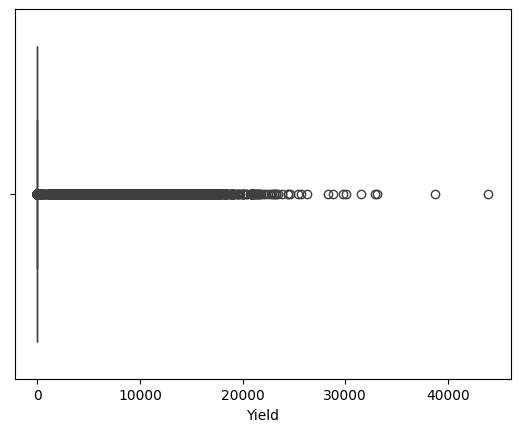

In [8]:
# Looking throungh Boxplot

sns.boxplot(x = 'Yield', data = df)
plt.show()

In [9]:
# By using Quantile Method Removing the Outlier

q1 = df['Yield'].quantile(0.25)
q3 = df['Yield'].quantile(0.75)
IQR = q3 - q1
min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR
new_df = df[df['Yield']<=max_range]
new_df.shape

(293832, 10)

# Analysis On crop Production

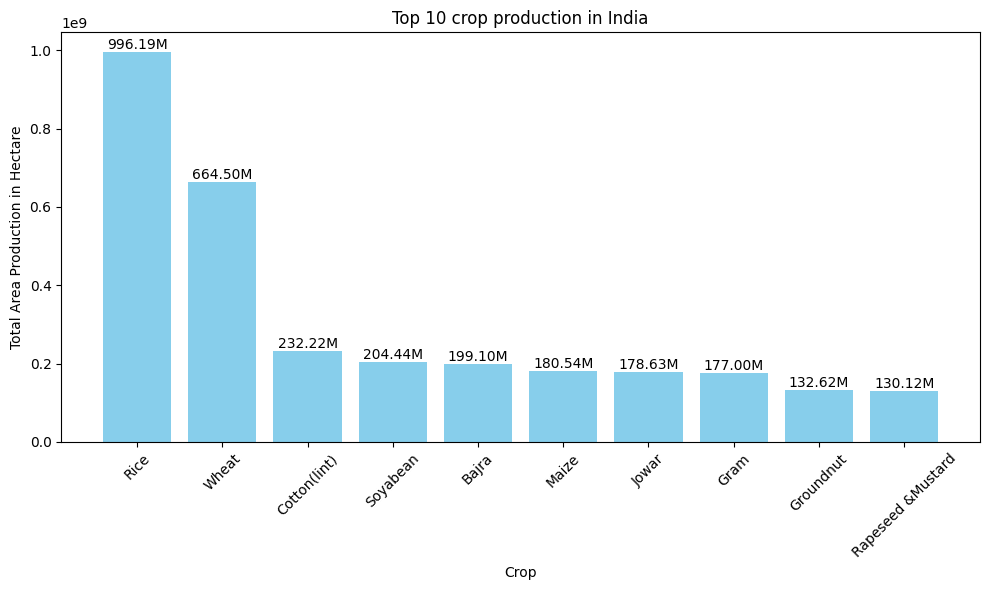

In [12]:
# Ploting the Bar Plot for top 10 Crop Production in India

df['Area'] = pd.to_numeric(df['Area'], errors = 'coerce')
crop_area = df.groupby('Crop')['Area'].sum().reset_index()
top_10_crop = crop_area.sort_values(by ='Area', ascending = False).head(10)
plt.figure(figsize=(10,6))
bars = plt.bar(top_10_crop['Crop'], top_10_crop['Area'], color = 'skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Area Production in Hectare')
plt.title('Top 10 crop production in India')
plt.xticks(rotation = 45)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    # Convert to millions and format the value
    label = f'{height/1e6:.2f}M'
    # Position the label on the bar
    plt.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom')

plt.show()

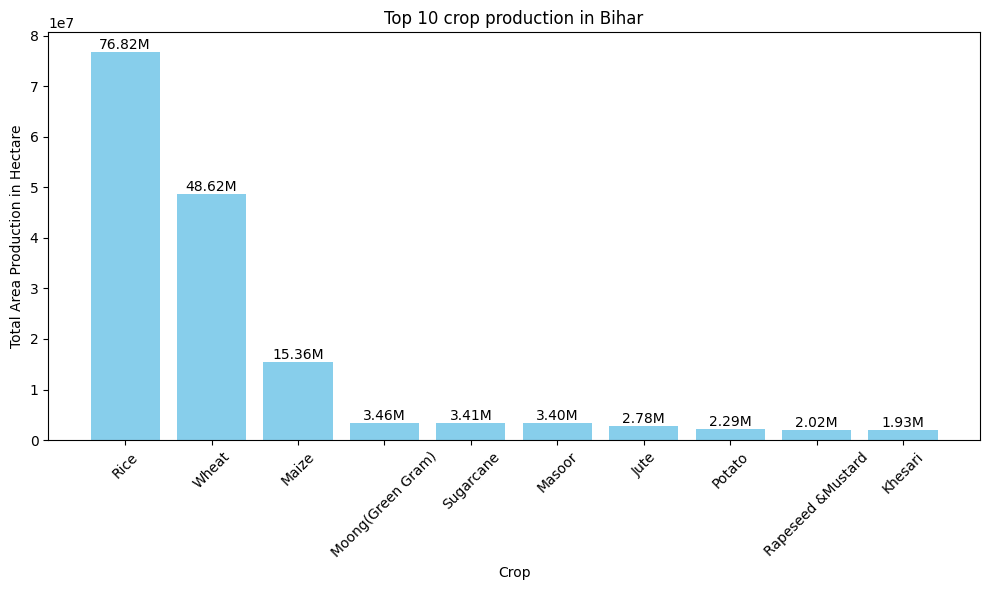

In [13]:
# Ploting the Bar Graph for top 10 crop produces in Bihar

df_bihar = df[df['State'] == 'Bihar']
df_bihar.loc[:, 'Area'] = pd.to_numeric(df_bihar['Area'], errors='coerce')
crop_area = df_bihar.groupby('Crop')['Area'].sum().reset_index()
top_10_crop = crop_area.sort_values(by ='Area', ascending = False).head(10)
plt.figure(figsize=(10,6))
bars = plt.bar(top_10_crop['Crop'], top_10_crop['Area'], color = 'skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Area Production in Hectare')
plt.title('Top 10 crop production in Bihar')
plt.xticks(rotation = 45)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    # Convert to millions and format the value
    label = f'{height/1e6:.2f}M'
    # Position the label on the bar
    plt.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom')

plt.show()

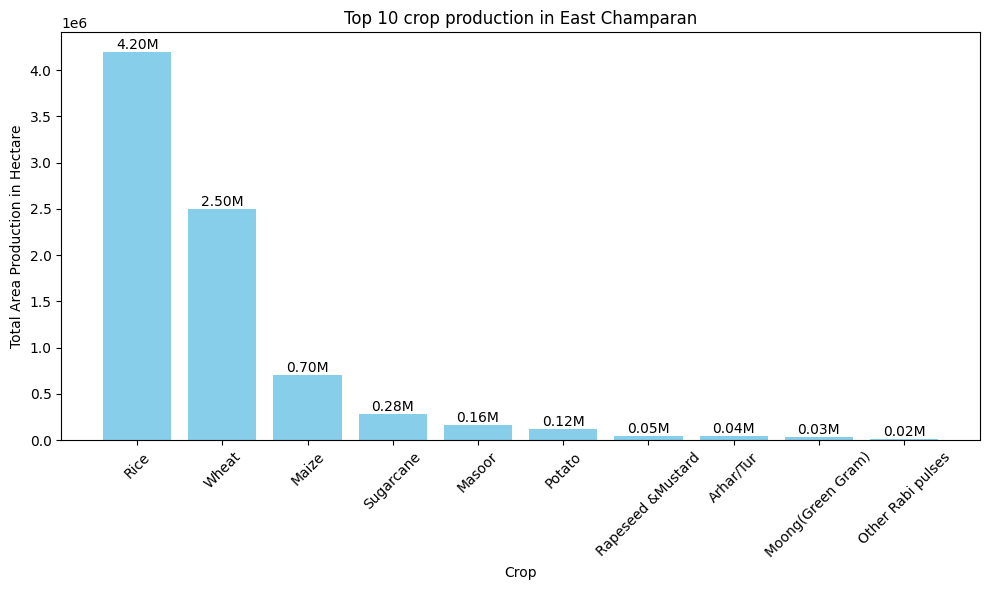

In [14]:
# Ploting the Bar Graph for top 10 crop produce in East Champaran

df_ec = df[(df['State'] == 'Bihar') & (df['District'] == 'PURBI CHAMPARAN')]
df_ec.loc[:,'Area'] = pd.to_numeric(df['Area'], errors = 'coerce')
crop_area = df_ec.groupby('Crop')['Area'].sum().reset_index()
top_10_crop = crop_area.sort_values(by ='Area', ascending = False).head(10)

plt.figure(figsize=(10,6))
bars = plt.bar(top_10_crop['Crop'], top_10_crop['Area'], color = 'skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Area Production in Hectare')
plt.title('Top 10 crop production in East Champaran')
plt.xticks(rotation = 45)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    # Convert to millions and format the value
    label = f'{height/1e6:.2f}M'
    # Position the label on the bar
    plt.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom')

plt.show()

# Determining Top Crop Produces by each State

In [13]:
# Detarning the top crop produces by the east state along with their production.

df = pd.read_csv('India_Agriculture_Crop_Production.csv')
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')
df['Production(Million KG)'] = df['Production']/10**3
idx = df.groupby('State')['Production(Million KG)'].transform('max') == df['Production(Million KG)']
top_crops = df[idx]

# Select relevant columns for output
top_crops = top_crops[['State', 'Crop', 'Production(Million KG)']]

# Display the results
pd.DataFrame(top_crops)

,State,Crop,Production(Million KG)
10692,Dadra and Nagar Haveli,Sugarcane,1.229600e+02
10748,Goa,Coconut,1.251200e+05
14553,Jharkhand,Rice,5.095690e+02
54307,Gujarat,Sugarcane,1.175400e+04
55479,Haryana,Sugarcane,2.894000e+03
69233,Nagaland,Sugarcane,1.601000e+02
83541,West Bengal,Coconut,7.509500e+04
87440,Arunachal Pradesh,Rice,3.501000e+01
115343,Puducherry,Coconut,2.201200e+04
119396,Tamil Nadu,Coconut,1.597800e+06


In [14]:
# Looking for top 3 rows of our Dataset

df.head(3)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,Production(Million KG)
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,2.061
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803,2.083
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358,1.525


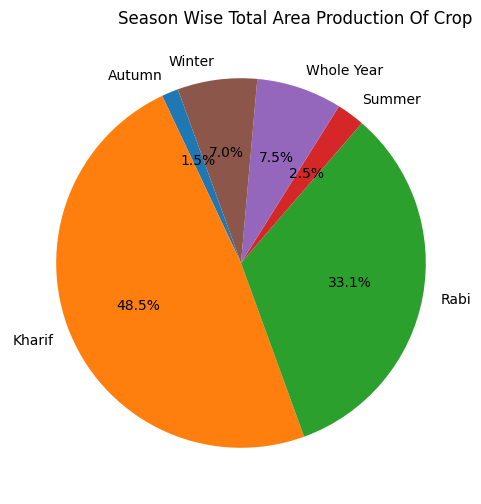

In [15]:
# Ploting the Pie-Chart for Season wise total production of the crop.

plt.figure(figsize=(6,6))
swp = df.groupby('Season')["Area"].sum()
plt.pie(swp, labels = swp.index , autopct ='%1.1f%%', startangle=110 )
plt.title("Season Wise Total Area Production Of Crop", loc = 'right')
plt.show()

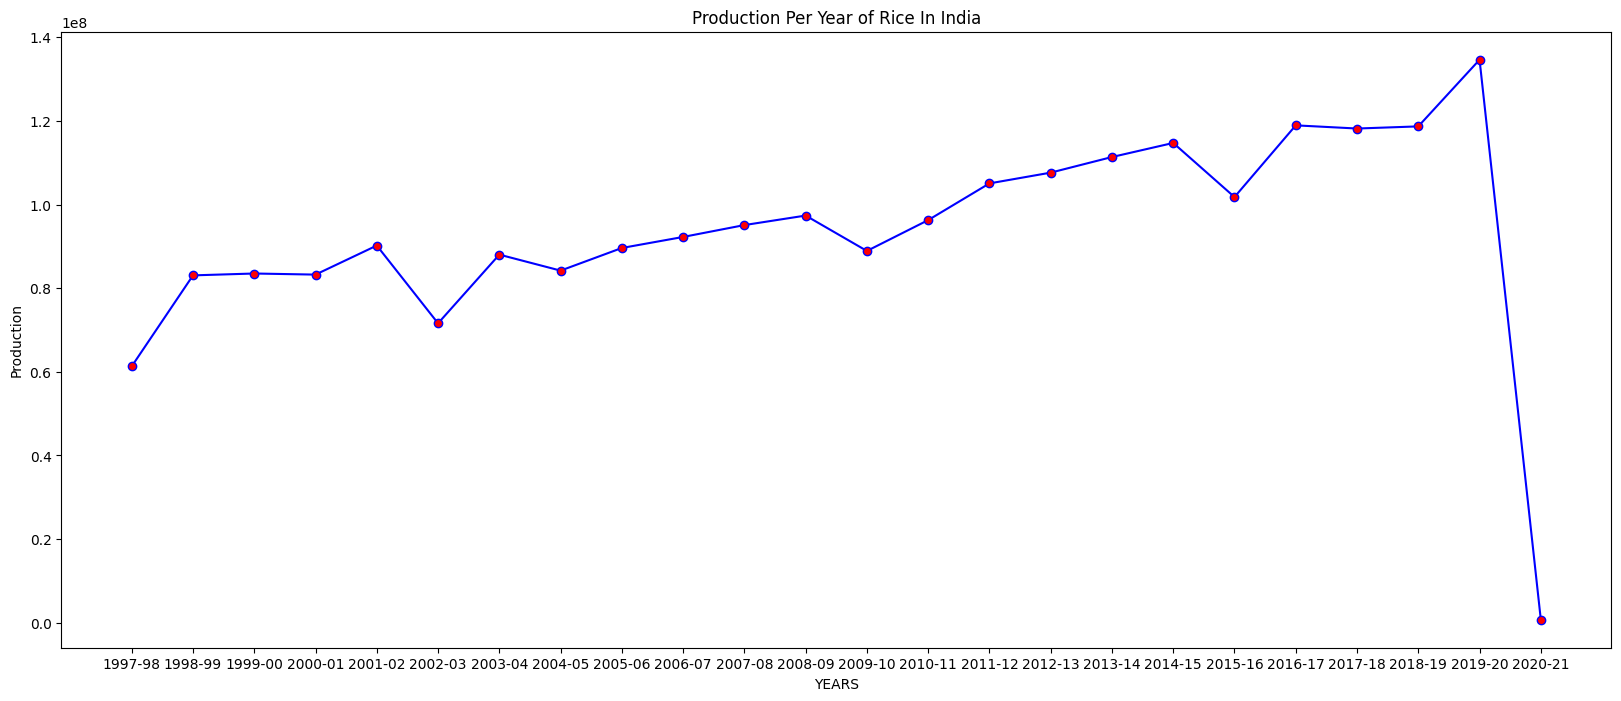

In [16]:
# Ploting the Line Graph of Rice production in India

filtered_data = df[(df['Crop'] == 'Rice')]
fil_data = filtered_data.groupby('Year')['Production'].sum().reset_index()
# fil_data = pd.DataFrame(fil_data)
plt.figure(figsize=(20,8))
plt.xlabel('YEARS')
plt.ylabel('Production')
plt.title('Production Per Year of Rice In India')
plt.plot(fil_data['Year'],fil_data['Production'],marker = 'o',mfc = 'red' ,color = 'b')
plt.show()

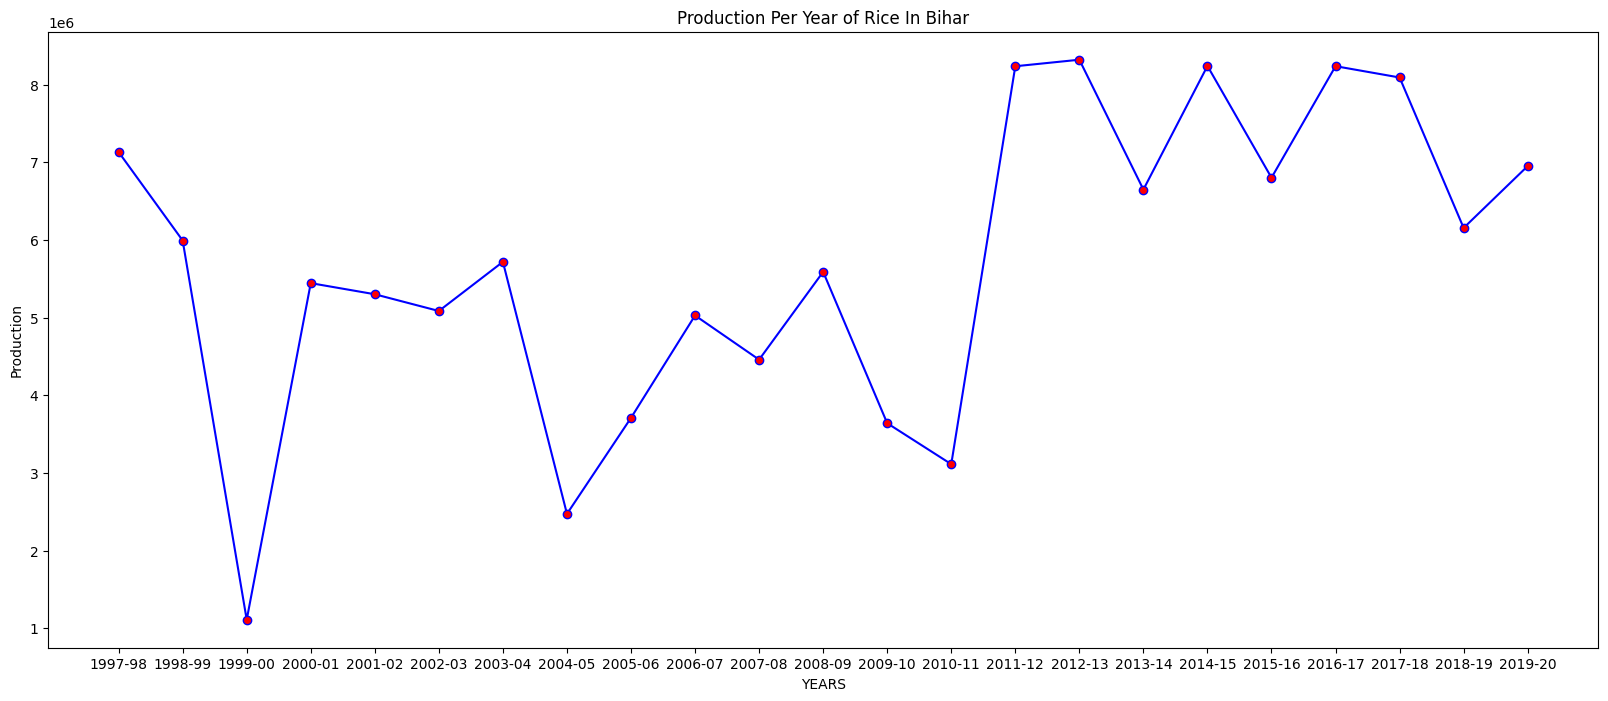

In [17]:
# Ploting the Line Graph of Rice production in Bihar

filtered_data = df[(df['Crop'] == 'Rice') & (df['State'] == 'Bihar')]
fil_data = filtered_data.groupby('Year')['Production'].sum().reset_index()
# fil_data = pd.DataFrame(fil_data)
plt.figure(figsize=(20,8))
plt.xlabel('YEARS')
plt.ylabel('Production')
plt.title('Production Per Year of Rice In Bihar')
plt.plot(fil_data['Year'],fil_data['Production'],marker = 'o',mfc = 'red' ,color = 'b')
plt.show()

<BarContainer object of 23 artists>

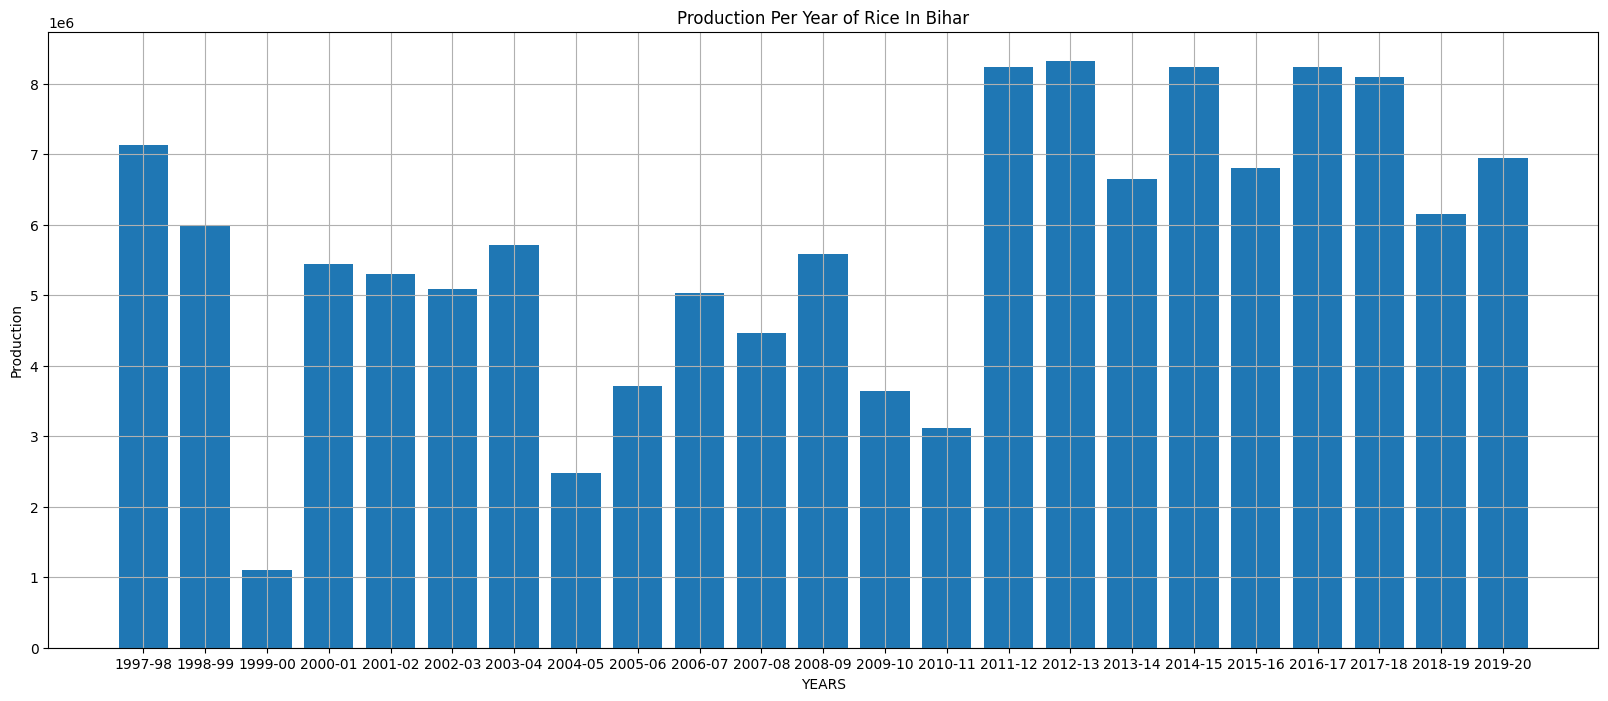

In [18]:
# Ploting the same in Bar Graph

filtered_data = df[(df['Crop'] == 'Rice') & (df['State'] == 'Bihar')]
fil_data = filtered_data.groupby('Year')['Production'].sum().reset_index()
# fil_data = pd.DataFrame(fil_data)
plt.figure(figsize=(20,8))
plt.xlabel('YEARS')
plt.ylabel('Production')
plt.title('Production Per Year of Rice In Bihar')
plt.grid(True)
plt.bar(fil_data['Year'],fil_data['Production'])

# Production Pridiction By Using Random Forest Model(Machine Learning)

In [19]:
df = pd.read_csv('India_Agriculture_Crop_Production.csv')

In [20]:
df.head(3)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358


In [21]:
df['Area Units'].value_counts()

Area Units
Hectare    345407
Name: count, dtype: int64

In [22]:
df = df.drop(columns = 'Area Units')

In [23]:
df = df.rename(columns = {'Area' : 'Area(Hectare)'})
df.head(3)

,State,District,Crop,Year,Season,Area(Hectare),Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1525.0,Tonnes,1.209358


In [24]:
df.shape

(345407, 9)

In [27]:
# only selecting those values whose units is 'Tonnes'

df_new = df[df['Production Units'] == 'Tonnes']

In [28]:
df_new.shape

(331686, 9)

In [33]:
# Droping the column 'Production Units', as their only values of tonnes

df_new = df_new.drop(columns = 'Production Units')

In [35]:
df_new = df_new.rename(columns = {'Production' : 'Production(Tonnes)'})
df_new.head(3)

,State,District,Crop,Year,Season,Area(Hectare),Production(Tonnes),Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1525.0,1.209358


In [36]:
# Checking for null values

df_new.isnull().sum()

State                    0
District                 0
Crop                    32
Year                     0
Season                   1
Area(Hectare)           33
Production(Tonnes)    4687
Yield                   33
dtype: int64

In [38]:
df_new['Crop'] = df_new['Crop'].fillna(df_new['Crop'].mode()[0])
df_new['Season'] = df_new['Season'].fillna(df_new['Season'].mode()[0])
df_new['Area(Hectare)'] = df_new['Area(Hectare)'].fillna(df_new['Area(Hectare)'].mean())
df_new['Production(Tonnes)'] = df_new['Production(Tonnes)'].fillna(df_new['Production(Tonnes)'].mean())
df_new['Yield'] = df_new['Yield'].fillna(df_new['Yield'].mean())

In [39]:
df_new.isnull().sum()

State                 0
District              0
Crop                  0
Year                  0
Season                0
Area(Hectare)         0
Production(Tonnes)    0
Yield                 0
dtype: int64

In [41]:
df_new.head(3)

,State,District,Crop,Year,Season,Area(Hectare),Production(Tonnes),Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1525.0,1.209358


In [42]:
level_encoders = {}
categorical_feature = ['State','District','Crop','Year','Season']

In [44]:
from sklearn.preprocessing import LabelEncoder

for feature in categorical_feature:
    level_encoders[feature] = LabelEncoder()
    df_new[feature] = level_encoders[feature].fit_transform(df_new[feature])

In [45]:
df_new.isnull().sum()

State                 0
District              0
Crop                  0
Year                  0
Season                0
Area(Hectare)         0
Production(Tonnes)    0
Yield                 0
dtype: int64

In [46]:
df_new.head(5)

,State,District,Crop,Year,Season,Area(Hectare),Production(Tonnes),Yield
0,0,481,0,4,1,1254.0,2061.0,1.643541
1,0,481,0,5,4,1258.0,2083.0,1.655803
2,0,481,0,6,4,1261.0,1525.0,1.209358
3,0,485,0,4,1,3100.0,5239.0,1.690000
4,0,627,0,5,4,3105.0,5267.0,1.696296


In [49]:
x = df_new.iloc[:,:-2]
y = df_new['Production(Tonnes)']

In [50]:
y

0          2061.000000
1          2083.000000
2          1525.000000
3          5239.000000
4          5267.000000
              ...     
345402    44984.234032
345403    44984.234032
345404    44984.234032
345405    44984.234032
345406    44984.234032
Name: Production(Tonnes), Length: 331686, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.3, random_state=42)

In [52]:
y_train

128759     131.0
328731    1920.0
134128     564.0
23210      600.0
66910      400.0
           ...  
124885      70.0
269972       2.0
137636    3634.0
153123    3831.0
126964     729.0
Name: Production(Tonnes), Length: 232180, dtype: float64

In [53]:
x_train

,State,District,Crop,Year,Season,Area(Hectare)
128759,35,182,15,10,2,361.0
328731,25,490,43,1,5,38.0
134128,3,360,23,13,2,1165.0
23210,20,107,22,5,2,500.0
66910,20,9,40,7,1,2900.0
...,...,...,...,...,...,...
124885,33,579,28,10,2,5.0
269972,33,566,9,21,2,2.0
137636,4,506,37,15,3,1581.0
153123,19,92,22,14,1,2803.0


In [55]:
x_test

,State,District,Crop,Year,Season,Area(Hectare)
122377,33,14,12,12,1,72.0
160026,24,440,24,13,1,20.0
136042,4,355,18,14,1,565.0
323269,20,469,29,1,1,100.0
170685,33,14,24,15,1,6.0
...,...,...,...,...,...,...
97065,11,473,43,10,4,4500.0
9097,6,167,13,5,4,1.0
53983,11,284,30,8,1,400.0
11533,11,348,24,4,1,1800.0


In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [58]:
# Checking our model accuracy..

rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100

(99.67095101916176, 97.25460877957187)

In [59]:
y_pred = rf.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error


# Calculating Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')



Root Mean Squared Error: 61677.028702919924


In [61]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.9725460877957186


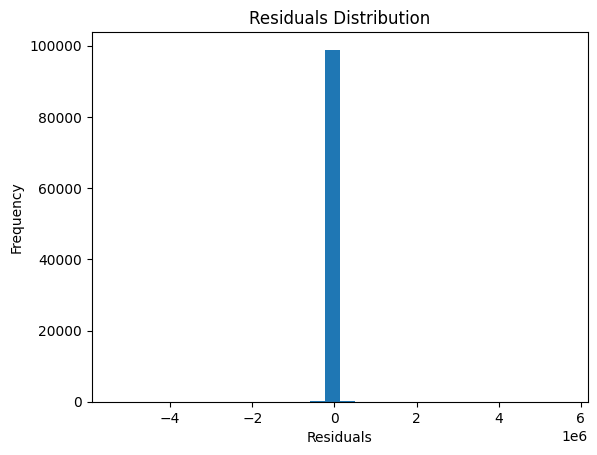

In [62]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


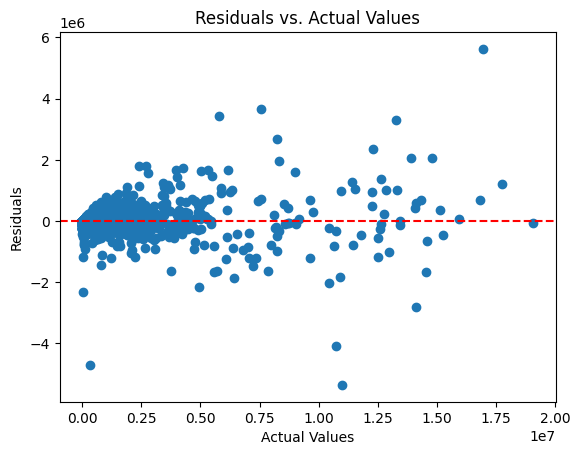

In [63]:
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


# Outlier Present in Our dataset. So, removing Outlier with z-score method

In [64]:
df_new.head(5)


,State,District,Crop,Year,Season,Area(Hectare),Production(Tonnes),Yield
0,0,481,0,4,1,1254.0,2061.0,1.643541
1,0,481,0,5,4,1258.0,2083.0,1.655803
2,0,481,0,6,4,1261.0,1525.0,1.209358
3,0,485,0,4,1,3100.0,5239.0,1.690000
4,0,627,0,5,4,3105.0,5267.0,1.696296


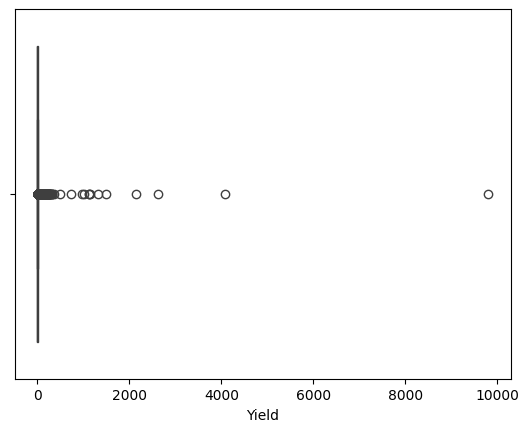

(331686, 8)

In [66]:
sns.boxplot(x = 'Yield', data = df_new)
plt.show()
df_new.shape

In [79]:
# Removing the outlier with IQR method

q1 = df['Yield'].quantile(0.25)
q3 = df['Yield'].quantile(0.75)
IQR = q3 - q1
min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR
new_data = df_new[df_new['Yield']<=max_range]
new_data.shape

(283344, 8)

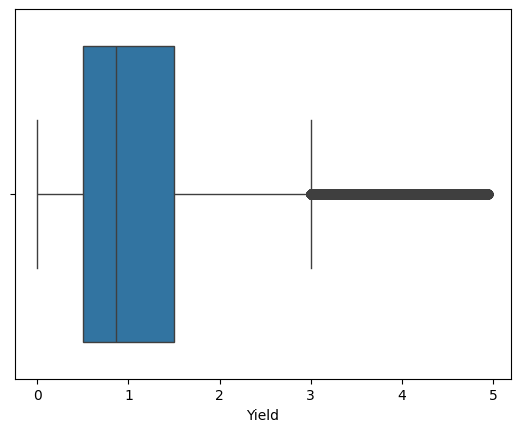

(283344, 8)

In [80]:
sns.boxplot(x = 'Yield', data = new_data)
plt.show()
new_data.shape

In [81]:
new_data.head(5)

,State,District,Crop,Year,Season,Area(Hectare),Production(Tonnes),Yield
0,0,481,0,4,1,1254.0,2061.0,1.643541
1,0,481,0,5,4,1258.0,2083.0,1.655803
2,0,481,0,6,4,1261.0,1525.0,1.209358
3,0,485,0,4,1,3100.0,5239.0,1.690000
4,0,627,0,5,4,3105.0,5267.0,1.696296


In [82]:
new_data.isnull().sum()

State                 0
District              0
Crop                  0
Year                  0
Season                0
Area(Hectare)         0
Production(Tonnes)    0
Yield                 0
dtype: int64

In [83]:
x1 = new_data.iloc[:,:-2]
y1 = new_data['Production(Tonnes)']

In [84]:
x1

,State,District,Crop,Year,Season,Area(Hectare)
0,0,481,0,4,1,1254.000000
1,0,481,0,5,4,1258.000000
2,0,481,0,6,4,1261.000000
3,0,485,0,4,1,3100.000000
4,0,627,0,5,4,3105.000000
...,...,...,...,...,...,...
345402,21,269,37,22,2,11275.094639
345403,21,586,37,22,2,11275.094639
345404,21,647,37,22,2,11275.094639
345405,21,662,37,22,2,11275.094639


In [85]:
y1

0          2061.000000
1          2083.000000
2          1525.000000
3          5239.000000
4          5267.000000
              ...     
345402    44984.234032
345403    44984.234032
345404    44984.234032
345405    44984.234032
345406    44984.234032
Name: Production(Tonnes), Length: 283344, dtype: float64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size=0.3, random_state=42)

In [88]:
x1_train

,State,District,Crop,Year,Season,Area(Hectare)
211425,30,170,9,18,4,87.0
73547,28,141,23,7,2,1.0
180484,3,330,36,17,2,19713.0
261850,28,66,50,21,2,16188.0
287542,19,664,37,22,1,1060.0
...,...,...,...,...,...,...
144752,13,97,42,14,1,9.0
317114,17,336,0,1,4,10832.0
159270,22,717,50,13,2,1.0
177564,1,522,24,17,1,514.0


In [89]:
y1_train

211425       52.00
73547         1.00
180484    11316.00
261850    27939.00
287542      673.33
            ...   
144752       14.00
317114    17899.00
159270        1.00
177564      278.00
147405      634.00
Name: Production(Tonnes), Length: 198340, dtype: float64

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()
rf1.fit(x1_train, y1_train)

RandomForestRegressor()

In [91]:
rf1.score(x1_train,y1_train)*100, rf1.score(x1_test,y1_test)*100

(99.32098405095063, 94.02973245216948)

In [92]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Make predictions on the test set
y1_pred = rf1.predict(x1_test)

# Step 2: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 22469.397795326462


In [93]:
from sklearn.metrics import r2_score
r2 = r2_score(y1_test, y1_pred)
print(f'R-squared: {r2}')

R-squared: 0.9402973245216949


In [94]:
# Prediction for Random Input

data = pd.DataFrame({
    'State' : ['Bihar'],
    'District' : ['PURBI CHAMPARAN'],
    'Crop' : ['Rice'],
    'Year' : ['2001-02'],
    'Season' : ['Summer'],
    'Area(Hectare)' :[413]
})


In [95]:
for feature in categorical_feature:
    data[feature] = level_encoders[feature].transform(data[feature])

In [98]:
# Prediction from model without removing outlier 

print('the total production(Hectare) =', rf.predict(data)[0])

the total production(Hectare) = 665.79


In [99]:
print('The Percentage Yeild is = ', rf.predict(data)[0]/data['Area(Hectare)'][0])

The Percentage Yeild is =  1.6120823244552058


In [100]:
# Prediction from model by removing outlier 

print('the total production(Hectare) =', rf1.predict(data)[0])

the total production(Hectare) = 788.93


In [101]:
print('The Percentage Yeild is = ', rf1.predict(data)[0]/data['Area(Hectare)'][0])

The Percentage Yeild is =  1.9102421307506052
